# Basis Model

basis model predicts allways the mean value of the target

In [1]:
# import packages
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [2]:
# import data
data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
data.head(2)

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,Bi_airquality,trafic_airquality,6fold_airquality
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,bad,yellow,med unhealthy
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,90.986667,90.211667,90.624814,0.179998,0.032399,90.641667,0.775000,bad,yellow,med unhealthy


In [3]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));



In [4]:
# with zindi data:

# mean target
mean_target_zindi = data.target.mean() # 58.24
# prediction are all the mean of the target 58.24
y_target_zindi = [mean_target_zindi for x in range (data.target.shape[0])]

# with our data : 

"""# transform all target values to log: 
y_target_log = [np.log1p(x) for x in y_target_zindi]
# mean value for log_target values
mean_target_log = np.mean(y_target_log) # 4.081
# prediction are all the mean of the log_target 
y_target_log = [mean_target_log for x in range (data.target.shape[0])]
"""

rmse_zindi = rmse(data.target, y_target_zindi)
#rmse_our =   rmse(data.log_target, y_target_log)



print('Zindi: ')
print (f'Mean Target : {mean_target_zindi:.2f} \t RMSE: {rmse_zindi:.2f} \t NRMSE: {rmse_zindi/mean_target_zindi:.2f}')
print('Our (log_transform)')
#print (f'Mean Target: {mean_target_log:.2f} \t RMSE: {rmse_our:.2f} \t NRMSE:{rmse_our/mean_target_log:.2f}') #54.354144

Zindi: 
Mean Target : 58.16 	 RMSE: 30.23 	 NRMSE: 0.52
Our (log_transform)


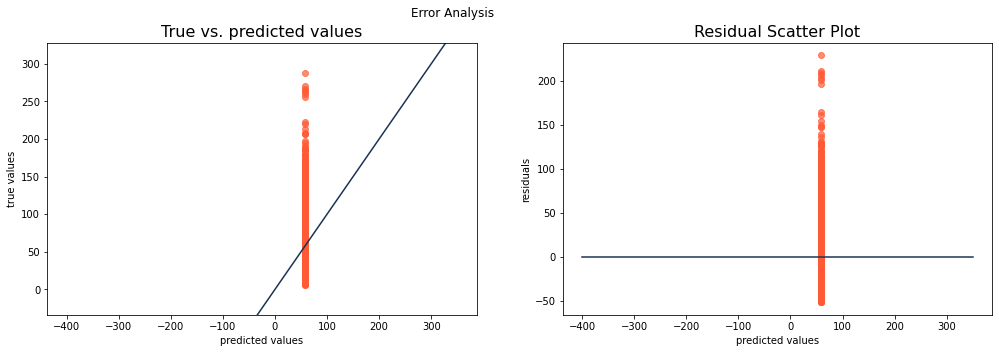

In [5]:
# error analysis 
error_analysis(data.target, y_target_zindi)  